# Data Exploration Of The NSCLC (donor 1) Dataset

In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np 

## Loading data

Load the AnnData object of the NSCLC dataset and convert it to a DataFrame.

In [2]:
# define the path to the AnnData object
load_path = "/home/cog/nlandzaat/rep_learning_sc_foundation/analysis/nlandzaat/2.NSCLC notebooks/adata_donor_1.h5ad"

# load the AnnData object
adata_donor_1 = sc.read_h5ad(load_path)

# convert the AnnData object to a Pandas DataFrame
df = adata_donor_1.to_df()

/hpc/compgen/users/nlandzaat/Software/anaconda3/envs/project_env_test/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## Data exploration

Firstly, we explore the dataset by investigating the number of genes that has an expression value of 0. Then, genes with expression values unequal to 0 are filtered out and their mean expressions are calculated. The top 200 genes with highest mean expression values are selected. The distribution of these mean expressions is analysed and visualised through a boxplot. 

In [3]:
# count the number of genes with expression value of 0
num_zero_genes = (df == 0).sum(axis=1)

print("Number of genes with expression value of 0:", num_zero_genes)

Number of genes with expression value of 0: 0       29364
1       28562
2       35105
3       31385
4       35142
        ...  
1896    36177
1897    35073
1898    33849
1899    34555
1900    35321
Length: 1901, dtype: int64


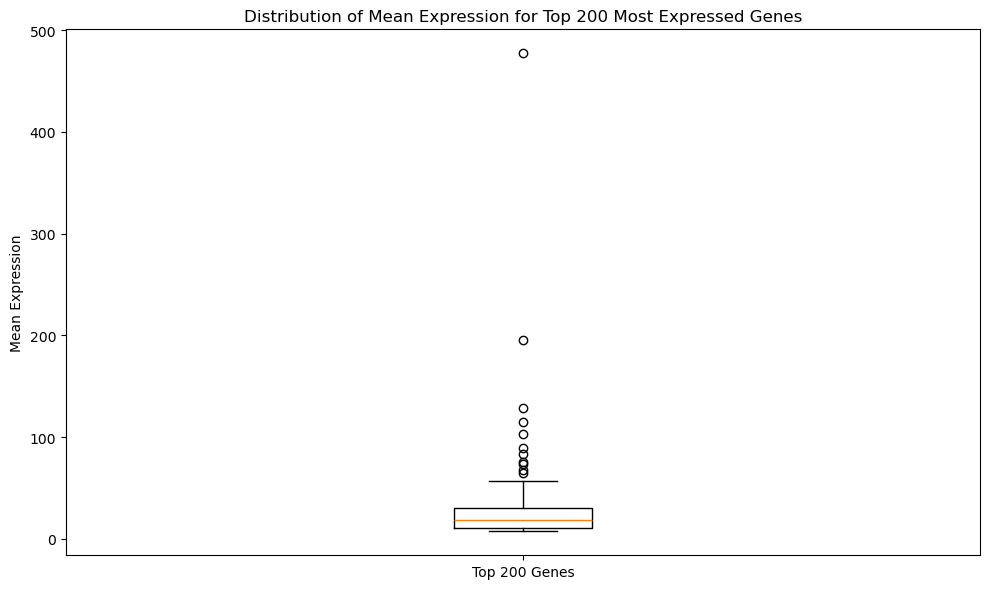

In [6]:
# filter out the genes with expression that is not zero
non_zero_genes_df = df.loc[:, (df != 0).any(axis=0)]

# calculate means for non-zero genes
non_zero_gene_means = non_zero_genes_df.mean()

# sort genes by mean expression and select top 200
top_200_genes = non_zero_gene_means.nlargest(200)

# create a boxplot of the means
plt.figure(figsize=(10, 6))
plt.boxplot(top_200_genes.values)
plt.title("Distribution of Mean Expression for Top 200 Most Expressed Genes")
plt.ylabel("Mean Expression")
plt.xticks([1], ["Top 200 Genes"])

plt.tight_layout()
plt.show()

In [8]:
# calculate median, IQR and range
median = np.median(top_200_genes.values)
Q1 = np.percentile(top_200_genes.values, 25)
Q3 = np.percentile(top_200_genes.values, 75)
IQR = Q3 - Q1
gene_range = np.max(top_200_genes.values) - np.min(top_200_genes.values)

print("IQR:", IQR)
print("Q3:", Q3)
print("median:", median)
print("Q1:", Q1)
print("Range of gene values:", gene_range)


IQR: 19.533404111862183
Q3: 29.999868869781494
median: 18.47554
Q1: 10.466464757919312
Range of gene values: 469.7054


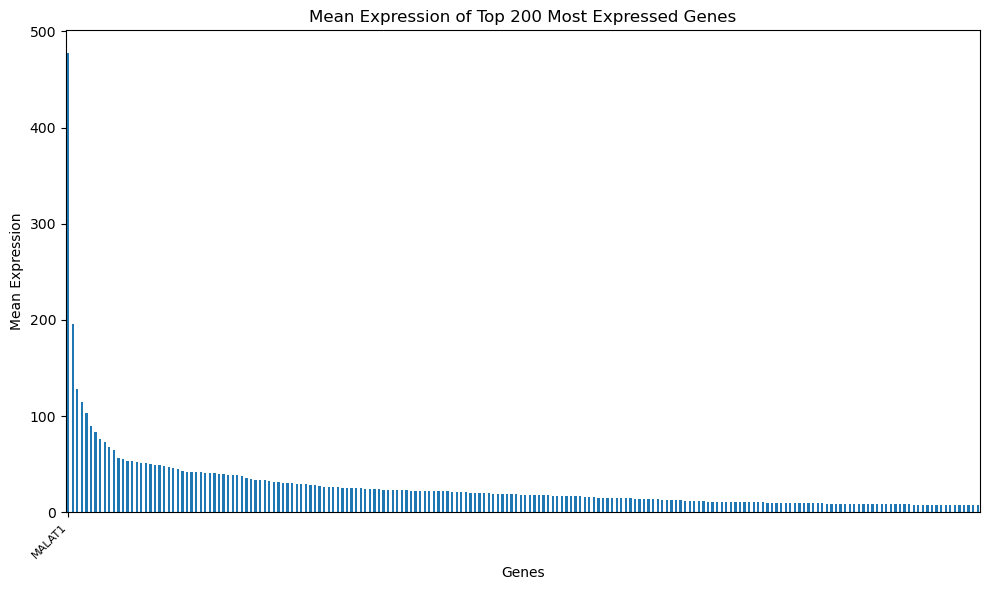

In [9]:
# plot the means of the top 200 most expressed genes
plt.figure(figsize=(10, 6))
top_200_genes.plot(kind="bar")
plt.title("Mean Expression of Top 200 Most Expressed Genes")
plt.xlabel("Genes")
plt.ylabel("Mean Expression")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.xticks([0], [top_200_genes.index[0]], fontsize=8)

plt.tight_layout()
plt.show()

In [10]:
# get the name of the gene with the highest mean expression
gene_with_highest_expression = top_200_genes.idxmax()

print("Gene with highest mean expression:", gene_with_highest_expression)


Gene with highest mean expression: MALAT1
